In [2]:
#️ Импорт библиотек
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [3]:
#️ Подключение к бд/создание новой бд
sqliteConnection = sqlite3.connect('../data/db_junyi', timeout=10)
cursor = sqliteConnection.cursor()
print("База данных создана и успешно подключена к SQLite")

База данных создана и успешно подключена к SQLite


In [4]:
with zipfile.ZipFile('../data/data.zip', 'r') as zip_ref:
        zip_ref.extractall('../data')

In [5]:
#️ Считывание данных в датафрейм
df_ic = pd.read_csv('../data/Info_Content.csv')

# Просмотр информации о данных
df_ic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ucid                 1330 non-null   object
 1   content_pretty_name  1330 non-null   object
 2   content_kind         1330 non-null   object
 3   difficulty           1330 non-null   object
 4   subject              1330 non-null   object
 5   learning_stage       1330 non-null   object
 6   level1_id            1330 non-null   object
 7   level2_id            1330 non-null   object
 8   level3_id            1330 non-null   object
 9   level4_id            1330 non-null   object
dtypes: object(10)
memory usage: 104.0+ KB


In [6]:
# Поиск дубликатов
df_ic.duplicated().sum()

0

In [7]:
# Просмотр статистики
df_ic.describe(include='object')

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
count,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
unique,1330,1320,1,4,1,3,1,10,42,171
top,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【一般】函數關係式,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,364ml6jwsO0pO5l86JBpC+KFYvYr7mn7S9gVuhoBnUE=
freq,1,2,1330,835,1330,784,1330,553,146,18


In [8]:
#️ Считывание данных в датафрейм
df_iu = pd.read_csv('../data/Info_UserData.csv')

# Просмотр информации о данных
df_iu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72758 entries, 0 to 72757
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   uuid                  72758 non-null  object
 1   gender                32905 non-null  object
 2   points                72758 non-null  int64 
 3   badges_cnt            72758 non-null  int64 
 4   first_login_date_TW   72758 non-null  object
 5   user_grade            72758 non-null  int64 
 6   user_city             72758 non-null  object
 7   has_teacher_cnt       72758 non-null  int64 
 8   is_self_coach         72758 non-null  bool  
 9   has_student_cnt       72758 non-null  int64 
 10  belongs_to_class_cnt  72758 non-null  int64 
 11  has_class_cnt         72758 non-null  int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 6.2+ MB


In [9]:
# Просмотр статистики
df_iu.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442
std,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000


In [10]:
# Поиск дубликатов
df_iu.duplicated().sum()

0

In [9]:
# Просмотр  данных начальных строк
df_iu.head(5)

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [11]:
# Подсчет количества пропусков
df_iu.isnull().sum()

uuid                        0
gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

In [12]:
# Т.к. пропущенных значений много, то заменим их на значение 'unspecified'
def replace_missing_gender(df):
    df['gender'] = df['gender'].fillna('unspecified')
    return df

df_iu = replace_missing_gender(df_iu)

# Подсчет количества пропусков
df_iu.isnull().sum()

uuid                    0
gender                  0
points                  0
badges_cnt              0
first_login_date_TW     0
user_grade              0
user_city               0
has_teacher_cnt         0
is_self_coach           0
has_student_cnt         0
belongs_to_class_cnt    0
has_class_cnt           0
dtype: int64

In [13]:
df_iu.head(5)

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,unspecified,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,unspecified,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,unspecified,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,unspecified,7945,0,2019-01-24,2,km,1,False,0,1,0


In [14]:
#️ Считывание данных в датафрейм
df_lp = pd.read_csv('../data/Log_Problem.csv')

# Просмотр информации о данных
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16217311 entries, 0 to 16217310
Data columns (total 14 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   timestamp_TW                     object
 1   uuid                             object
 2   ucid                             object
 3   upid                             object
 4   problem_number                   int64 
 5   exercise_problem_repeat_session  int64 
 6   is_correct                       bool  
 7   total_sec_taken                  int64 
 8   total_attempt_cnt                int64 
 9   used_hint_cnt                    int64 
 10  is_hint_used                     bool  
 11  is_downgrade                     object
 12  is_upgrade                       object
 13  level                            int64 
dtypes: bool(2), int64(6), object(6)
memory usage: 1.5+ GB


In [15]:
# Просмотр примеров данных
df_lp.sample(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
2087168,2018-10-12 17:00:00 UTC,ZaPvCgkAkWvc4dFL9uL3VA/8AW5nySDurpyUqKPRIVw=,cqTW0IXOg+J6y+Yk63csOn2IHYY4+Nqos2a87VHy6SI=,h+Fn6aqxfl1S3LldZnrJQ9fJzvP6IFco/Nx0I+I4Xkk=,28,3,True,16,1,0,False,NaN,NaN,0
14849445,2018-10-10 15:45:00 UTC,I0m7YVKCbXo2MOUYYAPlA4YY5U5J/QI+Bp1ZQm2bx1k=,NoiGICCqJdvFmvy6LlcPw0m5SH7C7FO4TMbJHCdlRz4=,/e7cVscyN5H7czYEPol2gTHlJMib7TPftwE3p7wzMcg=,7,1,False,30,2,1,True,NaN,NaN,0
5601839,2018-11-16 16:15:00 UTC,O+MeuLcOlHVSu72c2n1yJvX53yTPywayF+VcMv3wGu0=,fBA/dR3/vn5rjFVbPKC9asCyTQ2ieY/iBYb1sqWO2oc=,+ZUlXSABS0s2sG3XkAB7tFbN27fvazLF7uSxVI6poqw=,1,1,True,78,1,0,False,NaN,NaN,0
11702861,2019-07-04 16:45:00 UTC,T9+xBLRooMKCVn1XSHAIjju4/HzfE14MPe5gBge/z1M=,zX5HAUpRYC4F7YPNs5tUeBqVi++rEmPUfsAtHpoZmEQ=,o9WNwjME352ccMlhldfl1g38KX6YxiM0u10RXJdpmn4=,9,1,True,8,1,0,False,NaN,NaN,0
3146344,2019-04-30 16:45:00 UTC,fYwNKtSaGp+1LZKmMxewksDpTRXTXRU8+t6OJOdtSl8=,olB2B7ueYn8YeM/OoPIbIX+bgetpmV3h25n3vXx9wkY=,0aH7F3zJRTRw2uAjXhgEIGpKJiQaqptdBWEDi/L5GYo=,7,1,True,134,1,0,False,NaN,NaN,0


In [16]:
# Поиск дубликатов
df_lp.duplicated().sum()

0

In [17]:
# Просмотр статистики
df_lp.describe(include='object')

,timestamp_TW,uuid,ucid,upid,is_downgrade,is_upgrade
count,16217311,16217311,16217311,16217311,1781293,1781293
unique,30507,72758,1326,25785,2,2
top,2019-03-19 16:30:00 UTC,RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,VMScsPmyKXsk5k7+abPqyEbDFRSsCE2XZs5lMKHQHEM=,False,True
freq,7660,11813,138169,6994,1758026,1758026


In [18]:
# Подсчет количества пропусков
df_lp.isnull().sum()

timestamp_TW                              0
uuid                                      0
ucid                                      0
upid                                      0
problem_number                            0
exercise_problem_repeat_session           0
is_correct                                0
total_sec_taken                           0
total_attempt_cnt                         0
used_hint_cnt                             0
is_hint_used                              0
is_downgrade                       14436018
is_upgrade                         14436018
level                                     0
dtype: int64

In [19]:
# Замена пропусков на значение 'unspecified'
def replace_missing_downguprade(df):
    df['is_downgrade'] = df['is_downgrade'].fillna('unspecified')
    df['is_upgrade'] = df['is_upgrade'].fillna('unspecified')
    return df

replace_missing_downguprade(df_lp)
df_lp.isnull().sum()

timestamp_TW                       0
uuid                               0
ucid                               0
upid                               0
problem_number                     0
exercise_problem_repeat_session    0
is_correct                         0
total_sec_taken                    0
total_attempt_cnt                  0
used_hint_cnt                      0
is_hint_used                       0
is_downgrade                       0
is_upgrade                         0
level                              0
dtype: int64

In [20]:
#️ Создание в бд таблицы из датафрейма
df_ic.to_sql(con=sqliteConnection, name='info_content', index=False, if_exists = 'replace')

1330

In [21]:
#️ Создание в бд таблицы из датафрейма
df_iu.to_sql(con=sqliteConnection, name='info_userdata', index=False, if_exists = 'replace')

72758

In [22]:
#️ Создание в бд таблицы из датафрейма
df_lp.to_sql(con=sqliteConnection, name='log_problem', index=False, if_exists = 'replace')

16217311

## 1. Найти минимальное, максимальное и медианное количество очков пользователей. 

In [23]:
query = '''
    SELECT 
	    MIN(points) AS min_points, 
	    MAX(points) AS max_points
    FROM info_userdata iu;
    '''
minmax = pd.io.sql.read_sql(query, sqliteConnection)
minmax

,min_points,max_points
0,1,4047528


In [24]:
med_points = df_iu['points'].median()

med_points

20400.0

## 2. Посчитать учеников какой школы user_grade (начальной 1-6, средней 7-9 или старшей 10-12) больше среди пользователей.

In [25]:
# Начальная школа
query = '''
    SELECT COUNT(uuid) AS count_primary
    FROM info_userdata iu
    WHERE user_grade > 0 AND user_grade < 7;
    '''
df_count_primary = pd.io.sql.read_sql(query, sqliteConnection)
count_primary = df_count_primary.at [0, 'count_primary']
count_primary

47867

In [26]:
# Средняя школа
query = '''
    SELECT COUNT(uuid) AS count_junior
    FROM info_userdata iu 
    WHERE user_grade > 6 AND user_grade < 10;
    '''
df_count_junior = pd.io.sql.read_sql(query, sqliteConnection)
count_junior = df_count_junior.at [0, 'count_junior']
count_junior

22729

In [27]:
# Старшая школа
query = '''
    SELECT COUNT(uuid)  AS count_senior
    FROM info_userdata iu 
    WHERE user_grade > 9 AND user_grade < 13;
    '''
df_count_senior = pd.io.sql.read_sql(query, sqliteConnection)
count_senior = df_count_senior.at [0, 'count_senior']
count_senior

2162

In [28]:
# Объединение данных в один датафрейм
df_2task = pd.DataFrame({'user_grade': ['Начальная', 'Средняя', 'Старшая'],
        'count': [count_primary, count_junior, count_senior]
        })
df_2task

,user_grade,count
0,Начальная,47867
1,Средняя,22729
2,Старшая,2162


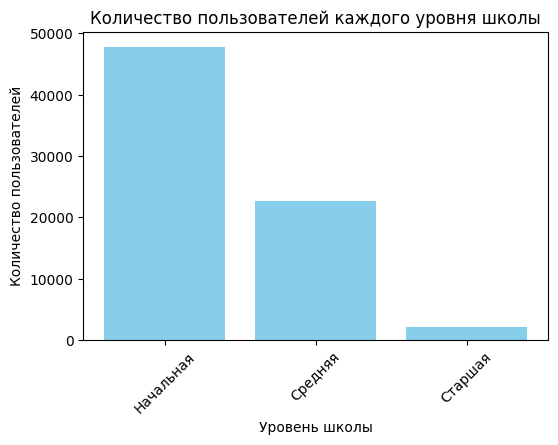

In [29]:
# Построение гистограммы
plt.figure(figsize=(6, 4))
plt.bar(df_2task['user_grade'], df_2task['count'], color='skyblue')
plt.xlabel('Уровень школы')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей каждого уровня школы')
plt.xticks(rotation=45)
plt.show()

## 3. Посчитать максимальное, минимальное и среднее количество учителей has_teacher_cnt и студентов has_student_cnt, которые имеют пользователи разных уровней школ; количество студентов, которые добавлялись как учителя сами себе и не добавлялись.

In [30]:
query = '''
    SELECT 
	    user_grade,
	    MAX(has_teacher_cnt) AS max_teacher,
	    MIN(has_teacher_cnt) AS min_teacher, 
	    ROUND(AVG(has_teacher_cnt)) AS avg_teacher,
	    MAX(has_student_cnt) AS max_student, 
	    MIN(has_student_cnt) AS min_student, 
	    ROUND(AVG(has_student_cnt)) AS avg_student 
    FROM info_userdata iu 
    WHERE iu.has_teacher_cnt != 0 AND iu.has_student_cnt != 0
    GROUP BY user_grade;
    '''
grade_count = pd.io.sql.read_sql(query, sqliteConnection)
grade_count

,user_grade,max_teacher,min_teacher,avg_teacher,max_student,min_student,avg_student
0,1,15,1,4.0,37,1,4.0
1,2,29,1,6.0,772,1,72.0
2,3,41,1,4.0,105,1,8.0
3,4,92,1,5.0,185,1,11.0
4,5,66,1,5.0,966,1,16.0
5,6,102,1,5.0,403,1,11.0
6,7,76,1,4.0,271,1,11.0
7,8,24,1,4.0,45,1,6.0
8,9,22,1,3.0,121,1,13.0
9,10,6,1,2.0,46,1,7.0


In [31]:
query = '''
    SELECT
	    user_grade,
	    ROUND(CAST(SUM(is_self_coach) * 100.0 / COUNT(is_self_coach) AS DECIMAL(5,2)), 2) AS self_coach_percentage,
        ROUND(CAST((COUNT(is_self_coach) - SUM(is_self_coach)) * 100.0 / COUNT(is_self_coach) AS DECIMAL(5,2)), 2) AS not_self_coach_percentage
    FROM info_userdata iu 
    GROUP BY user_grade;
    '''
grade_self = pd.io.sql.read_sql(query, sqliteConnection)
grade_self

,user_grade,self_coach_percentage,not_self_coach_percentage
0,1,1.01,98.99
1,2,0.83,99.17
2,3,0.72,99.28
3,4,0.85,99.15
4,5,1.05,98.95
5,6,0.86,99.14
6,7,0.81,99.19
7,8,0.54,99.46
8,9,0.47,99.53
9,10,1.03,98.97


In [32]:
df_grade = pd.merge(grade_count, grade_self, on='user_grade')
df_grade

,user_grade,max_teacher,min_teacher,avg_teacher,max_student,min_student,avg_student,self_coach_percentage,not_self_coach_percentage
0,1,15,1,4.0,37,1,4.0,1.01,98.99
1,2,29,1,6.0,772,1,72.0,0.83,99.17
2,3,41,1,4.0,105,1,8.0,0.72,99.28
3,4,92,1,5.0,185,1,11.0,0.85,99.15
4,5,66,1,5.0,966,1,16.0,1.05,98.95
5,6,102,1,5.0,403,1,11.0,0.86,99.14
6,7,76,1,4.0,271,1,11.0,0.81,99.19
7,8,24,1,4.0,45,1,6.0,0.54,99.46
8,9,22,1,3.0,121,1,13.0,0.47,99.53
9,10,6,1,2.0,46,1,7.0,1.03,98.97


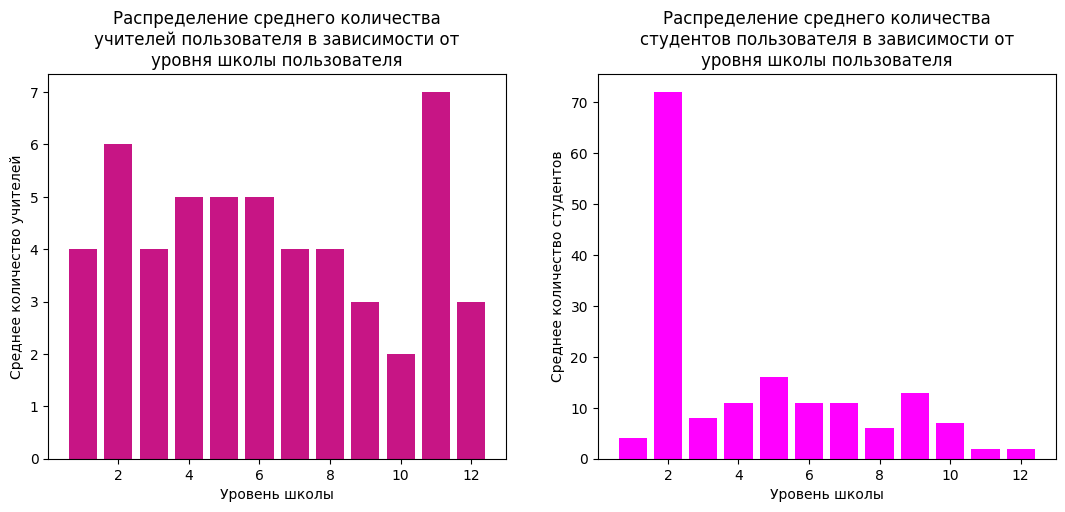

In [33]:
# Построение графиков
figure, axis = plt.subplots(1, 2, figsize = (13,5))

axis[0].bar(df_grade['user_grade'], df_grade['avg_teacher'], color='#C71585')
axis[0].set(xlabel = 'Уровень школы', ylabel = 'Среднее количество учителей', title = 'Распределение среднего количества\nучителей пользователя в зависимости от\nуровня школы пользователя')

axis[1].bar(df_grade['user_grade'], df_grade['avg_student'], color='#FF00FF')
axis[1].set(xlabel = 'Уровень школы', ylabel = 'Среднее количество студентов', title = 'Распределение среднего количества\nстудентов пользователя в зависимости от\nуровня школы пользователя')

plt.show()

## 4. Среди первых 1000 пользователей с максимальными по рангу очками вывести количество задач, с которыми столкнулся этот пользователь, включая эту задачу, в этом упражнении (problem_number); сколько раз пользователь сталкивается с этой задачей в этом упражнении (exercise_problem_repeat_session); среднее total_sec_taken число секунд, которое пользователь из данной группы потратил на решение  этих задач в разрезе количества задач.

In [34]:
query = '''
    WITH RatingUsers AS (
    SELECT 
    	uuid, 
    	points, 
    	ROW_NUMBER() OVER (ORDER BY points DESC) AS rating
    FROM info_userdata
    LIMIT 1000)
    SELECT 
	    ru.rating, 
	    ru.uuid, 
	    ru.points, 
	    lp.problem_number, 
	    lp.exercise_problem_repeat_session,
	    lp.total_sec_taken,
        AVG(lp.total_sec_taken) OVER (PARTITION BY lp.problem_number) AS avg_sec
    FROM RatingUsers ru
    JOIN log_problem lp 
    ON ru.uuid = lp.uuid
    GROUP BY 1
    HAVING rating <= 1000
    ORDER BY ru.points DESC;
    '''
top1000 = pd.io.sql.read_sql(query, sqliteConnection)
top1000.head(15)

,rating,uuid,points,problem_number,exercise_problem_repeat_session,total_sec_taken,avg_sec
0,1,7mSXZHToBDVaMf4ySrAOlmja0JoSkYY9TC/Gn00KBq0=,4047528,1,1,16,110.138298
1,2,Wl5mStvfvquqRbYdvqVc5qJ/BPXl/+OVYfkiftlPJg4=,2519566,16,2,14,37.769231
2,3,anD2RqFosjmBY0VvYQXa9idhW4acUN0+IsH+lub8hrI=,2476118,3,1,6,36.506667
3,4,1BEe60SWSROvrGBEACcgwbpXVkYxYFRmX3oFKml9DTY=,2268567,64,4,4,7.000000
4,5,GBYu8DnnHLRpBVL3wflqQgAjYGUt+RorhvKicOVE5x0=,2105792,1,1,38,110.138298
5,6,4zOjLjq8SXadqNatjUbSRRfVfAYxSkrKQPXIWO7nn1Q=,2069024,13,1,13,31.714286
6,7,Z949Xw0O3LpwC8umTPwz+OAE2cNMhFf6Tqgm1Xg7/JY=,2059589,8,1,52,32.444444
7,8,1Mu4HQwpCFX0olLoJrHWE+XWq6XIaJ13Y14QePDB6fQ=,1984137,11,1,9,31.486486
8,9,mzIuPqJIQy94DmoZ9PzjcycXFKCvhSwjUQ4AEKnrRII=,1979716,10,1,13,57.735849
9,10,RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=,1945741,4,1,129,54.227848


In [35]:
df_4task = top1000[['problem_number', 'avg_sec']]
df_4task = df_4task.drop_duplicates(subset=['problem_number', 'avg_sec'])
df_4task = df_4task.reset_index(drop= True)
df_4task

,problem_number,avg_sec
0,1,110.138298
1,16,37.769231
2,3,36.506667
3,64,7.000000
4,13,31.714286
...,...,...
68,93,3.000000
69,141,10.000000
70,37,51.000000
71,91,15.000000


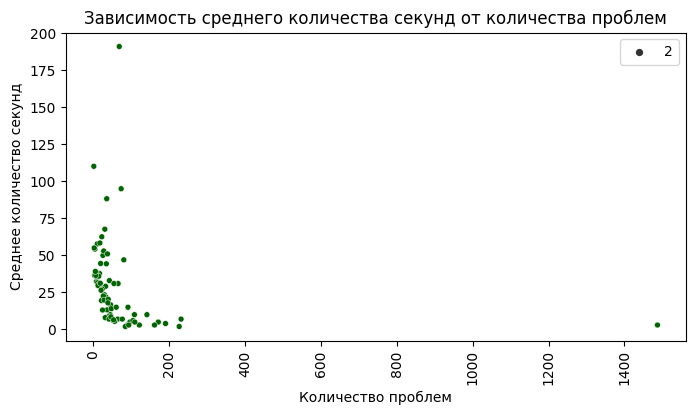

In [36]:
plt.figure(figsize=(8, 4))

sns.scatterplot(x='problem_number', y='avg_sec', data=df_4task, size = 2, color='darkgreen')

plt.xlabel('Количество проблем')
plt.ylabel('Среднее количество секунд')
plt.title('Зависимость среднего количества секунд от количества проблем')
plt.xticks(rotation=90)
plt.show()

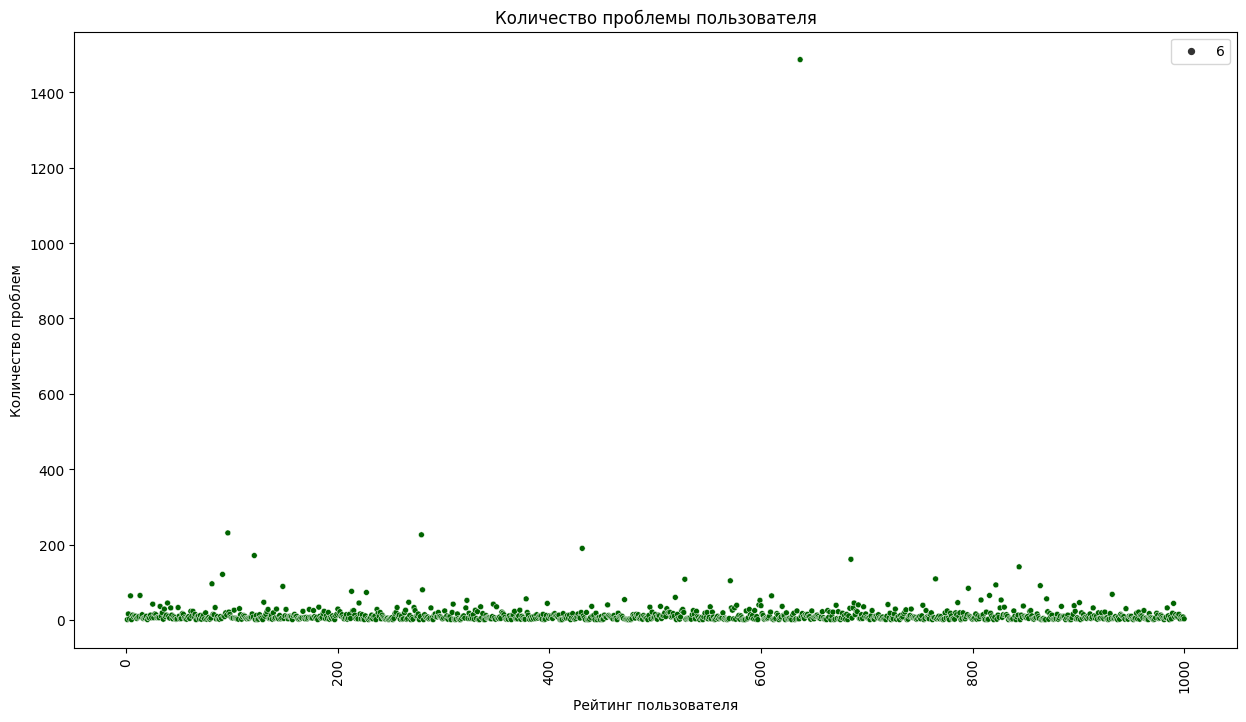

In [37]:
top1000viz = top1000[['rating', 'problem_number', 'total_sec_taken']]
plt.figure(figsize=(15, 8))

sns.scatterplot (x='rating', y='problem_number', data=top1000viz, size = 6, color='darkgreen')

plt.xlabel('Рейтинг пользователя')
plt.ylabel('Количество проблем')
plt.title('Количество проблемы пользователя')
plt.xticks(rotation=90)
plt.show()

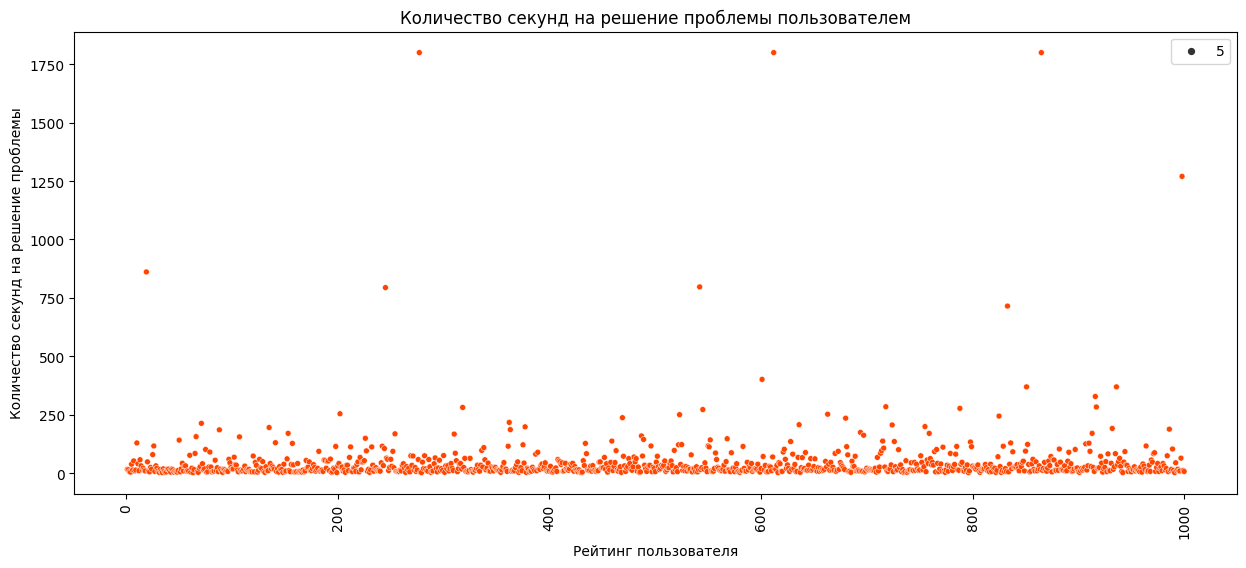

In [38]:
top1000viz = top1000[['rating', 'total_sec_taken']]

plt.figure(figsize=(15, 6))
sns.scatterplot (x='rating', y='total_sec_taken', data=top1000viz, size = 5, color='#FF4500')

plt.xlabel('Рейтинг пользователя')
plt.ylabel('Количество секунд на решение проблемы')
plt.title('Количество секунд на решение проблемы пользователем')
plt.xticks(rotation=90)
plt.show()

## 5. Посчитать среднее количество очков points и среднее количество значков badges_cnt в разрезе уровней пользователя level

In [39]:
query = '''
    SELECT 
        lp.level,
        ROUND(AVG(iu.points)) AS avg_points,
        ROUND(AVG(iu.badges_cnt)) AS avg_badges_cnt
    FROM log_problem lp
    JOIN info_userdata iu 
    ON lp.uuid = iu.uuid
    GROUP BY lp.level;
    '''
bylevel = pd.io.sql.read_sql(query, sqliteConnection)
bylevel

,level,avg_points,avg_badges_cnt
0,0,255810.0,38.0
1,1,326856.0,40.0
2,2,422540.0,48.0
3,3,457557.0,50.0
4,4,481983.0,51.0


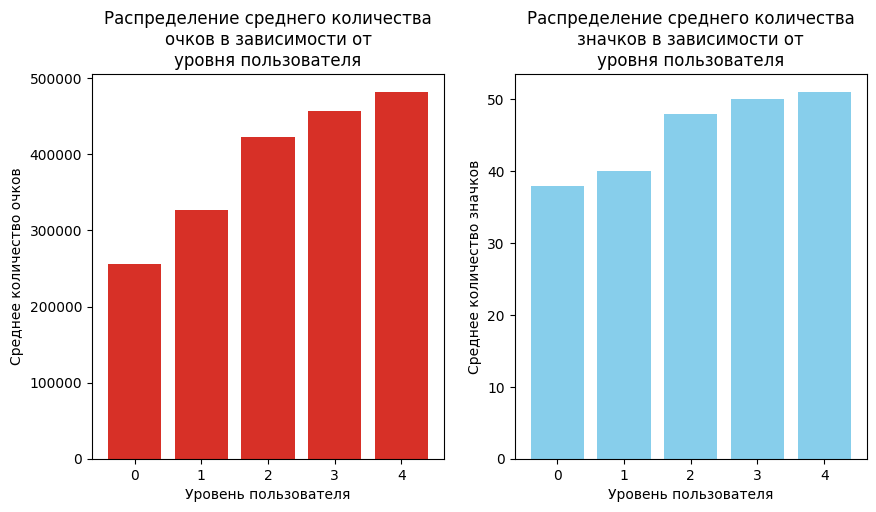

In [40]:
# Построение графиков
figure, axis = plt.subplots(1, 2, figsize = (10,5))

axis[0].bar(bylevel['level'], bylevel['avg_points'], color='#d73027')
axis[0].set(xlabel = 'Уровень пользователя', ylabel = 'Среднее количество очков', title = 'Распределение среднего количества\nочков в зависимости от\nуровня пользователя')
axis[1].bar(bylevel['level'], bylevel['avg_badges_cnt'], color='skyblue')
axis[1].set(xlabel = 'Уровень пользователя', ylabel = 'Среднее количество значков', title = 'Распределение среднего количества\nзначков в зависимости от\nуровня пользователя')

plt.show()

## 6. Для каждого уровня пользователей (level от 0 до 4) узнать: что делали пользователи чаще: использовали подсказку или нет; сколько раз минимально и максимально использовали подсказку, если использовали; сколько процентов пользователей каждого уровня ответили правильно и неправильно.

In [41]:
query = '''
    SELECT 
        level, 
        ROUND(CAST(SUM(is_hint_used) * 100.0 / COUNT(is_hint_used) AS FLOAT), 2) AS used_hint_count,
        ROUND(100 - CAST(SUM(is_hint_used) * 100.0 / COUNT(is_hint_used) AS FLOAT), 2) AS not_used_hint_count
    FROM log_problem
    GROUP BY level;
'''
usedhint = pd.io.sql.read_sql(query, sqliteConnection)
usedhint

,level,used_hint_count,not_used_hint_count
0,0,27.99,72.01
1,1,9.94,90.06
2,2,9.69,90.31
3,3,7.62,92.38
4,4,3.16,96.84


In [42]:
query = '''
    SELECT 
        level,
        MIN(used_hint_cnt) AS min_used_hint_count,
        MAX(used_hint_cnt) AS max_used_hint_count
    FROM log_problem
    WHERE is_hint_used == 1
    GROUP BY level;
'''
minmaxhint = pd.io.sql.read_sql(query, sqliteConnection)
minmaxhint

,level,min_used_hint_count,max_used_hint_count
0,0,1,65
1,1,1,20
2,2,1,13
3,3,1,13
4,4,1,12


In [43]:
query = '''
    SELECT 
        level,
        SUM(CASE WHEN is_correct = 1 THEN 1 ELSE 0 END) AS correct_count,
        SUM(CASE WHEN is_correct = 0 THEN 1 ELSE 0 END) AS incorrect_count,
        COUNT(*) AS total_count,
        (SUM(CASE WHEN is_correct = 1 THEN 1 ELSE 0 END) * 100 / COUNT(*)) AS correct_percentage,
        (SUM(CASE WHEN is_correct = 0 THEN 1 ELSE 0 END) * 100 / COUNT(*)) AS incorrect_percentage
    FROM log_problem
    GROUP BY level;
'''
corr_perc = pd.io.sql.read_sql(query, sqliteConnection)
corr_perc

,level,correct_count,incorrect_count,total_count,correct_percentage,incorrect_percentage
0,0,7580377,4228742,11809119,64,35
1,1,2023626,329042,2352668,86,13
2,2,853503,143316,996819,85,14
3,3,663415,88009,751424,88,11
4,4,291637,15644,307281,94,5


<Axes: title={'center': 'Ответили правильно/неправильно'}, xlabel='Уровень пользователя', ylabel='Процент пользователей'>

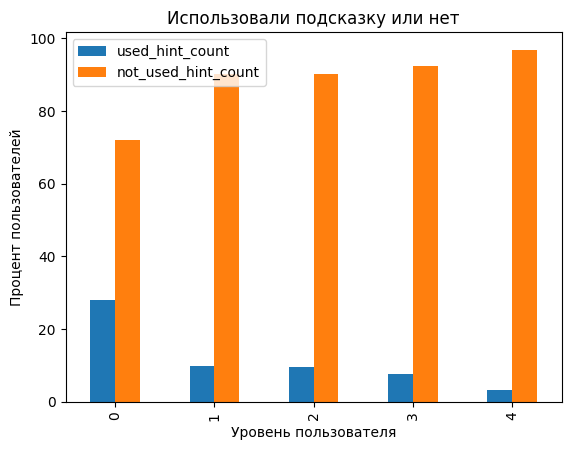

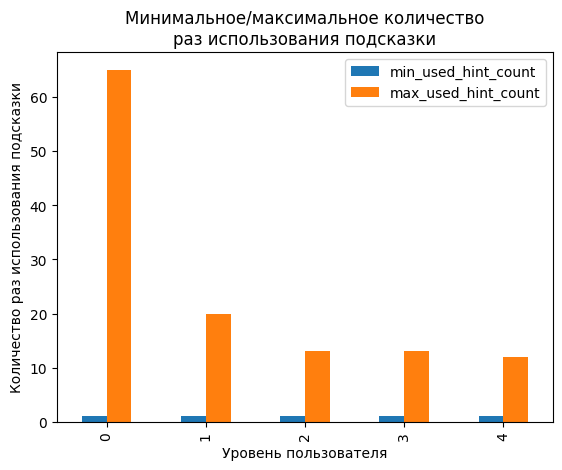

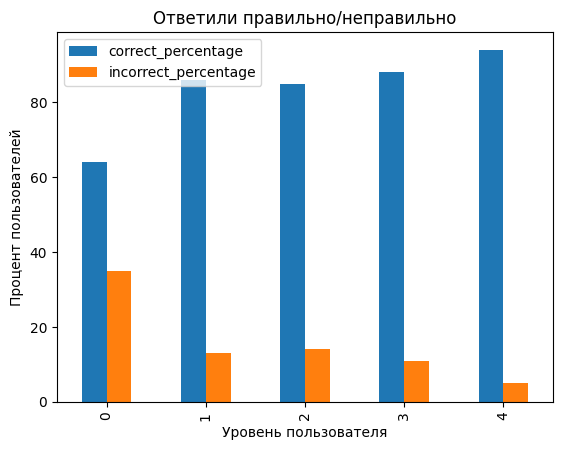

In [44]:
usedhint.plot(x='level', y=['used_hint_count', 'not_used_hint_count'], kind="bar", xlabel = 'Уровень пользователя', ylabel = 'Процент пользователей', title = 'Использовали подсказку или нет') 

minmaxhint.plot(x='level', y=['min_used_hint_count', 'max_used_hint_count'], kind="bar", xlabel = 'Уровень пользователя', ylabel = 'Количество раз использования подсказки', title = 'Минимальное/максимальное количество\nраз использования подсказки')

corr_perc.plot(x='level', y=['correct_percentage', 'incorrect_percentage'], kind="bar", xlabel = 'Уровень пользователя', ylabel = 'Процент пользователей', title = 'Ответили правильно/неправильно')